In [1]:
pip install --upgrade nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import nltk
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train_orignal = train.copy()

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [6]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

test_original = test.copy()

In [7]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [8]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [9]:
combined_data = pd.concat([train, test], ignore_index=True, sort=True)
combined_data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [10]:
combined_data.tail()


,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [11]:
#cleaning data 
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern in the text and will put it in a list
    r = re.findall(pattern,text)
    
    # re.sub() will substitute all the @ with an empty character
    for i in r:
        text = re.sub(i,"",text)
        
    return text

In [12]:
combined_data['Cleaned_Tweets'] = np.vectorize(remove_pattern)(combined_data['tweet'],"@[\w]*")

combined_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
combined_data['Cleaned_Tweets'] = combined_data['Cleaned_Tweets'].str.replace("[^a-zA-Z#]"," ")

combined_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [14]:
combined_data['Cleaned_Tweets'] = combined_data['Cleaned_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combined_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [15]:
tokenized_tweets = combined_data['Cleaned_Tweets'].apply(lambda x: x.split())

tokenized_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: Cleaned_Tweets, dtype: object

In [16]:
#stemming
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: Cleaned_Tweets, dtype: object

In [17]:

for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])
    
combined_data['Clean_Tweets'] = tokenized_tweets
combined_data.head()

,id,label,tweet,Cleaned_Tweets,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...,thank #lyft credit can't caus they don't offer...
2,3,0.0,bihday your majesty,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation,factsguide: societi #motiv


In [18]:
pip install wordcloud

In [19]:
#Data visulaization

from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [20]:
#Storing all the non-sexist/racist words
positive_words = ' '.join(text for text in combined_data['Cleaned_Tweets'][combined_data['label'] == 0])


In [21]:
# Generating images
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We will use the ImageColorGenerator to generate the color of the image
image_color = ImageColorGenerator(Mask)

# Now we will use the WordCloud function of the wordcloud library
wc = WordCloud(background_color='black',height=1500,width=4000,mask=Mask).generate(positive_words)

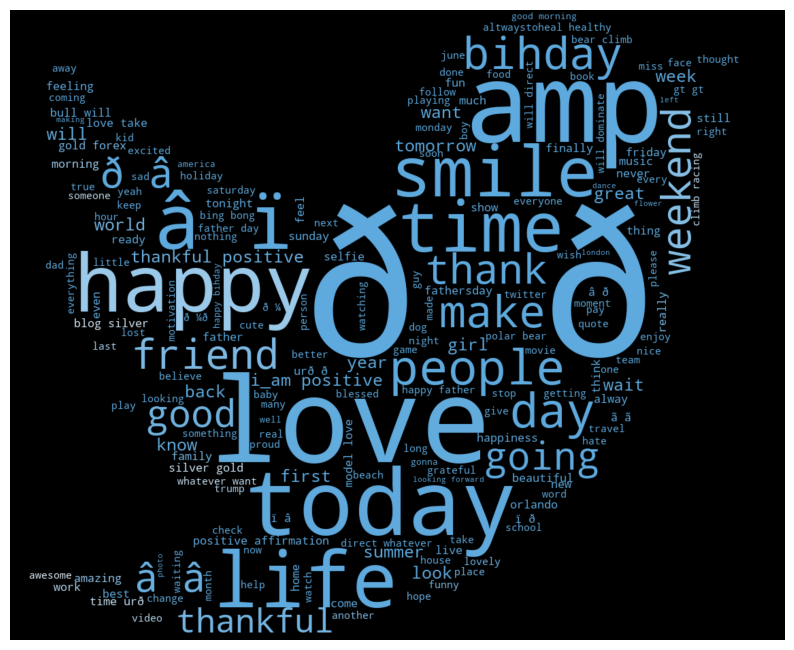

In [23]:

# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# interpolation is used to smooth the image generated

plt.imshow(wc.recolor(color_func=image_color),interpolation="hamming")

plt.axis('off')
plt.show()

In [24]:
negative_words = ' '.join(text for text in combined_data['Clean_Tweets'][combined_data['label'] == 1])


In [25]:
# Combining Image with Dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(negative_words)

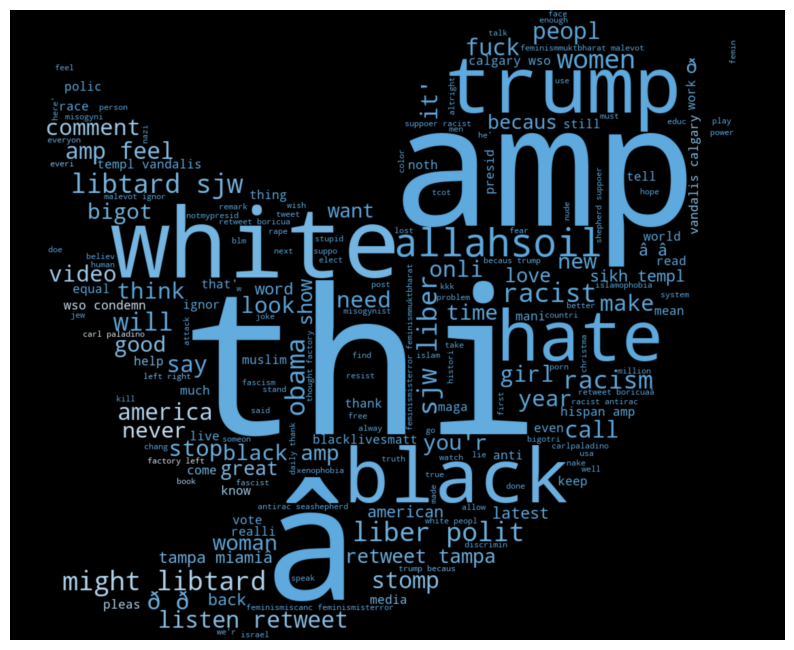

In [26]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()


In [29]:
#extracting hastags
def extractHashtags(x):
    hashtags = []
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [30]:
positive_hashTags = extractHashtags(combined_data['Cleaned_Tweets'][combined_data['label'] == 0])

positive_hashTags

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['80days', 'gettingfed'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro2016'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'],
 []

In [31]:
#Now unnesting the list:
positive_hastags_unnested = sum(positive_hashTags,[])
positive_hastags_unnested

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1989',
 

In [32]:
#Now storing the negative hastags:
negative_hashtags = extractHashtags(combined_data['Cleaned_Tweets'][combined_data['label'] == 1])

In [33]:
negative_hashtags_unnest = (sum(negative_hashtags,[]))
negative_hashtags_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'medâ',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'â',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflictâ',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 '2016',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'p21',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'praised',
 'cleveland',
 

In [34]:
#Plotting Bar Plots
positive_word_freq = nltk.FreqDist(positive_hastags_unnested)

positive_word_freq

FreqDist({'love': 1531, 'positive': 874, 'healthy': 570, 'smile': 548, 'thankful': 491, 'fun': 434, 'life': 405, 'summer': 367, 'model': 364, 'affirmation': 363, ...})

In [35]:
positive_df = pd.DataFrame({'Hashtags': list(positive_word_freq.keys()),'Count' : list(positive_word_freq.values())})
positive_df

,Hashtags,Count
0,run,33
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,364
...,...,...
22595,ucsdâ,1
22596,berlincitygirl,1
22597,zÃ¼rich,1
22598,genf,1


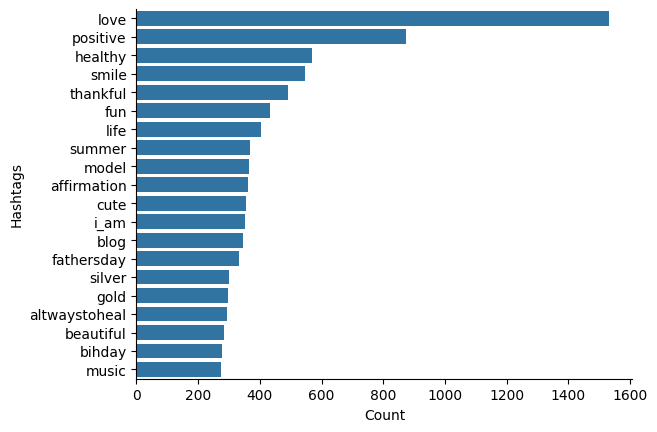

In [36]:
#Plotting the bar plot for 20 most frequent words:
positive_df_plot = positive_df.nlargest(20,columns='Count')

sns.barplot(data=positive_df_plot,y='Hashtags',x='Count')
sns.despine()

In [37]:
#Negative Word Frequency:
negative_word_freq = nltk.FreqDist(negative_hashtags_unnest)

negative_word_freq

FreqDist({'trump': 133, 'politics': 94, 'allahsoil': 92, 'libtard': 76, 'liberal': 75, 'sjw': 74, 'retweet': 57, 'black': 44, 'miamiâ': 38, 'hate': 32, ...})

In [38]:
#Creating a dataset of the most frequent words:
negative_df = pd.DataFrame({'Hashtags':list(negative_word_freq.keys()),'Count':list(negative_word_freq.values())})

negative_df

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2
...,...,...
1926,jumpedtheshark,1
1927,freemilo,5
1928,milo,4
1929,mailboxpride,1


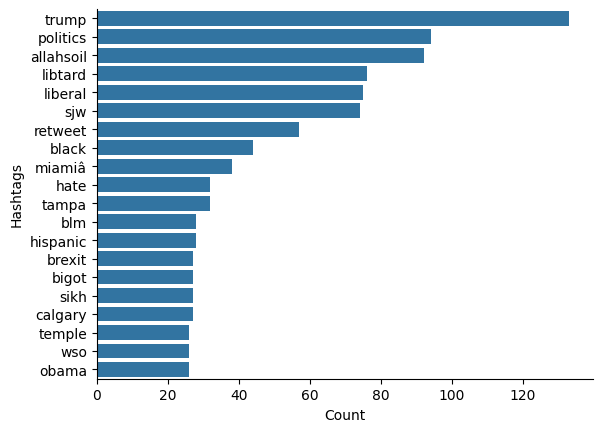

In [39]:
#Plotting the bar plot for the 20 most frequent negative words:
negative_df_plot = negative_df.nlargest(20,columns='Count')

sns.barplot(data=negative_df_plot,y='Hashtags',x='Count')
sns.despine()